In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT
import TestTools as TT
import SolverTools as ST

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 100000)

In [2]:
nh = 64
refRatio = 2
finehalf = list(np.arange(int(nh / refRatio)))
omega = BT.Grid(nh)
omegaFine = omega
wavesFine = WT.MakeWaves(omega)
omega.AddPatch(refRatio, finehalf)
waves = WT.MakeWaves(omega)
nullspace = OT.FindNullspace(omega, waves)
wavesMod = waves @ nullspace
sigma = 0.1
mu = 0.5
c = 1.
nt = 160
CFL = 0.5

[64, 128]
look: 128 128
h is 0.015625
[ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
[ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126]
64 128
[[ 6.36619772e-01  6.47619126e-01  6.16584665e-01 ...  6.46335344e-01  1.58666421e-02  6.36619772e-01]
 [-6.36619772e-01  5.84064798e-01 -6.77093416e-01 ... -6.44778265e-01 -4.75617022e-02 -6.36619772e-01]
 [-6.36619772e-01 -7.04936529e-01 -5.50137867e-01 ...  6.41667860e-01  7.91421820e-02  6.36619772e-01]
 ...
 [-5.92561524e-15 -5.98106395e-01 -1.49817853e-01 ... -3.85527956e-03 -1.53911387e-02  0.00000000e+00]
 [ 3.74185090e-15  6.09911067e

(11,)
(96, 96)
(96,)
(96,)
[[ 1.          0.          0.         ...  0.          0.          0.        ]
 [ 0.         -0.70710678 -0.70710678 ...  0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678 ...  0.          0.          0.        ]
 ...
 [ 0.          0.          0.         ... -0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.         ... -0.70710678 -0.70710678  0.        ]
 [ 0.          0.          0.         ...  0.          0.          1.        ]]
[[ 1.          0.          0.         ...  0.          0.          0.        ]
 [ 0.         -0.70710678 -0.70710678 ...  0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678 ...  0.          0.          0.        ]
 ...
 [ 0.          0.          0.         ...  0.35215275 -0.13765895 -0.25526845]
 [ 0.          0.          0.         ... -0.13781489 -0.1530701   0.15744665]
 [ 0.          0.          0.         ...  0.25528065 -0.15745272 -0.17347568]]
shape shift a

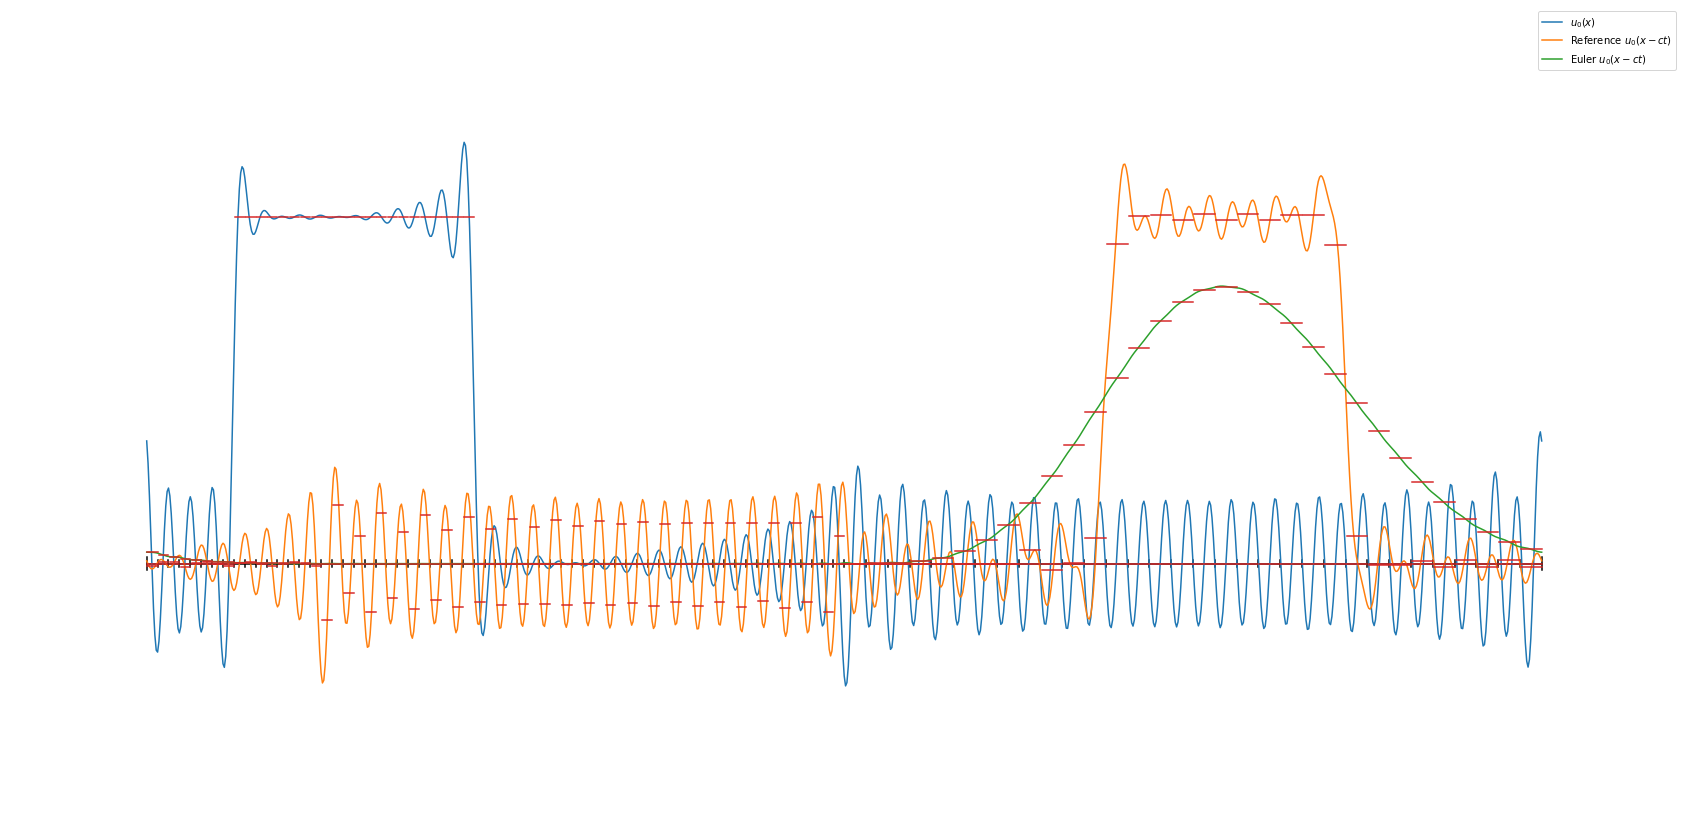

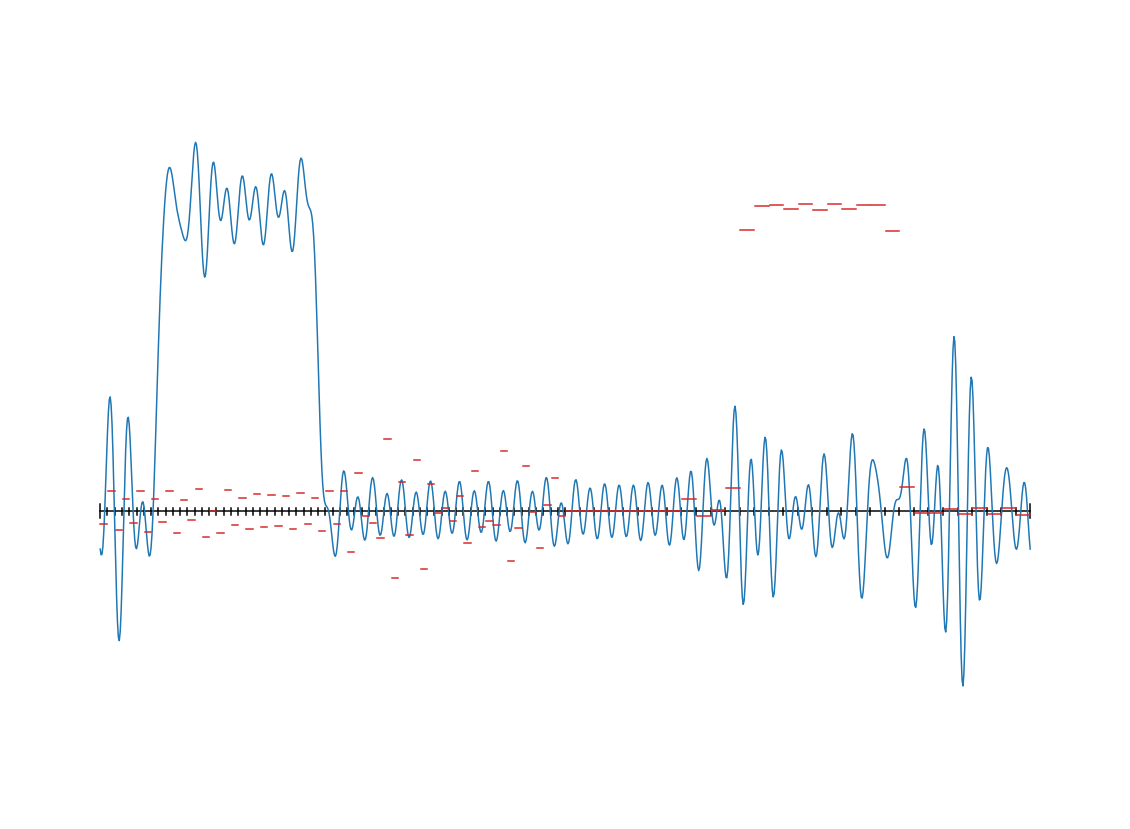

In [6]:
t, nt = ST.CalcTime(omega, CFL, c, nt = 160)

func = np.zeros(omega.degFreed, float) # TT.Gauss(omega, sigma, mu)
func[8:30] = 1
print(np.shape(func[8:19]))
print(np.shape(wavesMod))
print(np.shape(func))
FCoefs = FFTT.FourierCoefs(omega, wavesMod, func)
# FCoefs[::2] = 0
gauss = wavesMod @ FCoefs
EulerCoefs = ST.ForwardEuler(omega, wavesMod, func, nt, c, CFL)
print(np.shape(EulerCoefs))
propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t, nullspace = nullspace)
print(np.shape(propFCoefs))
print(np.shape(FCoefs))
allCoefs = PT.Load(FCoefs, propFCoefs, EulerCoefs)
print('nullspace')
print(np.shape(allCoefs))
print('nullspace')
print(np.shape(nullspace @ allCoefs))
propWaves = FFTT.PropWaves(omega, waves, c, t)
propNull = OT.FindNullspace(omega, propWaves)
PT.PlotMixedWave(omega, waves, nullspace @ allCoefs, rescale = 6, labels = [r'$u_{0} (x)$', r'Reference $u_{0} (x - c t)$', r'Euler $u_{0} (x - c t)$'], dpi = 300)
PT.PlotMixedWave(omega, propWaves, propNull @ FCoefs, rescale = [4,6])


ValueError: x and y must have same first dimension, but have shapes (128,) and (96,)

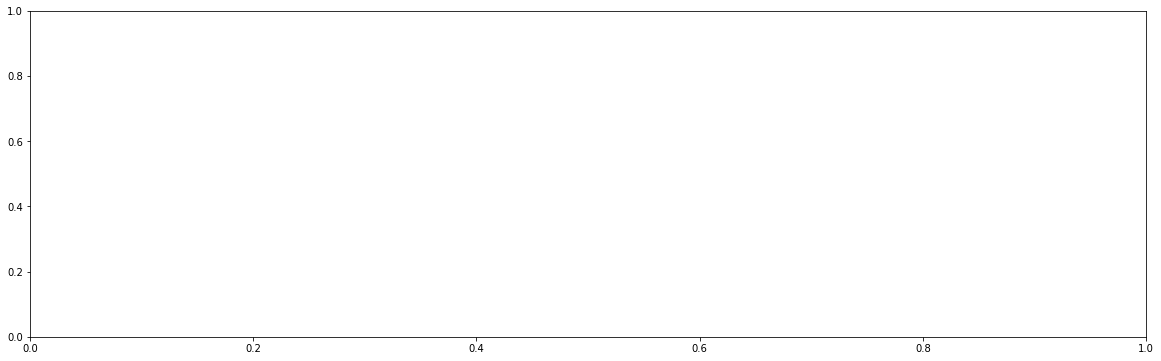

In [4]:
ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ks, error)
# plt.plot(ks, EulerCoefs)
# plt.plot(ks, propFCoefs)
plt.title('Error for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.show()

In [ ]:
norms, CFLs = TT.NormVersusCFL(ST.ForwardEuler, omega, waves, gauss, c, CFL, nt, normType = 'L1', errorType = 'absolute')
plt.figure()
plt.plot(CFLs, norms)
plt.title('Error versus CFL Condition for Forward Euler')
plt.xlabel('CFL')
plt.ylabel('Error')
plt.show()


In [ ]:
A = np.arange(20)
B = A[::2][1:]
C = A[1::2][:-1]
print(A)
print(B)
print(C)
print(propFCoefs)

In [ ]:
ampKs, ampError = TT.AmpError(omega, EulerCoefs, propFCoefs)

In [ ]:
ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ampKs, ampError)
plt.title('Amplitude Error for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.show()

In [ ]:
deltaCoefs = np.ones(nh, float)
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [ ]:
deltaCoefs[1::2] = 0
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [ ]:
deltaCoefs = np.ones(nh, float)
deltaCoefs[::2] = 0
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [ ]:
Cosine = lambda k: np.cos(2. * np.pi * k)
Sine = lambda k: np.sin(2. * np.pi * k)
RotMat = lambda k: np.asarray([Cosine(k), -Sine(k), Sine(k), Cosine(k)]).reshape(2, 2)
print(RotMat(0.125))

In [ ]:
def ExplicitMidpoint(omega, waves, u0, nt, const, CFL, periodic = True):
    degFreed = omega.degFreed
    x = omega.xCell
    dx = omega.dx
    dx_0 = 1 - x[::-1][0] + x[0]
    dt = CFL * dx / const
    dt_0 = CFL * dx_0 / const
    t = nt * dt[0]
    u = u0.copy()
    
    
#     for n in range(nt):
#         u_f = u[::-1][0]
#         u[1:] = u[1:] - (const * (dt / dx) * (u[1:] - u[:-1]))
#         if (periodic == True):
#             u[0] = u[0] - (const * (dt_0 / dx_0) * (u[0] - u_f))
    
    h = (b - a) / n;
halfh = h / 2;
y(1,:) = ya;
t(1) = a;
for i = 1 : n
    t(i+1) = t(i) + h;
    z = y(i,:) + halfh * f(t(i),y(i,:));
    y(i+1,:) = y(i,:) + h * f(t(i)+halfh,z);
    
    
    uCoefs = LA.inv(waves) @ u
    return uCoefs, t

In [ ]:
def MidpointMeth(omega, waves, u0, nt, const, CFL, periodic = True): # (def_fn, a, b, N, ya):
    degFreed = omega.degFreed
    x = omega.xCell
    dx = omega.dx
    dx_min = np.min(dx)
    dx_0 = 1 - x[::-1][0] + x[0]
    dt = CFL * dx_min / const
    dt_0 = CFL * dx_0 / const
    t = nt * dt
    u = u0.copy()
    u1 = u0.copy()
    for n in range(nt):
        u1, t = ST.ForwardEuler(omega, waves, u1, 1, const, CFL / 2, periodic = periodic)
        u2, t = ST.ForwardEuler(omega, waves, u + (dt * u1 / 2.), 1, const, CFL / 2, periodic = periodic)
        u = u + (dt * u2)
    uCoefs = LA.inv(waves) @ u

    return uCoefs, t

In [ ]:
nh = 64
refRatio = 2
omega = BT.Grid(nh)
waves = WT.MakeWaves(omega)
nt = 20

In [ ]:
func = np.zeros(omega.degFreed, float) # TT.Gauss(omega, sigma, mu)
func[8:30] = 1
print(np.shape(wavesMod))
print(np.shape(func))
FCoefs = FFTT.FourierCoefs(omega, waves, func)
# FCoefs[::2] = 0
EulerCoefs, t = MidpointMeth(omega, waves, func, nt, c, CFL)
print(np.shape(EulerCoefs))
# propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
allCoefs = PT.Load(FCoefs, EulerCoefs)
PT.PlotMixedWave(omega, waves, allCoefs, rescale = [4, 6], labels = [r'$u_{0} (x)$', r'Midpoint Method $u_{0} (x - c t)$'], save = True)

